In [2]:
import numpy as np

eff_a = np.loadtxt('effA_-5to30.dat')

# print(eff_a[:,4])

arg = np.abs(10 - eff_a[:,0])
print(arg)
print(eff_a[arg.argmin()][4])

[9.900000e+00 9.874107e+00 9.841511e+00 9.800474e+00 9.748811e+00
 9.683772e+00 9.601893e+00 9.498813e+00 9.369043e+00 9.205672e+00
 9.000000e+00 8.741070e+00 8.415110e+00 8.004740e+00 7.488110e+00
 6.837720e+00 6.018930e+00 4.988130e+00 3.690430e+00 2.056720e+00
 0.000000e+00 2.589300e+00 5.848900e+00 9.952600e+00 1.511890e+01
 2.162280e+01 2.981070e+01 4.011870e+01 5.309570e+01 6.943280e+01
 9.000000e+01 1.158930e+02 1.484890e+02 1.895260e+02 2.411890e+02
 3.062280e+02 3.881070e+02 4.911870e+02 6.209570e+02 7.843280e+02
 9.900000e+02 1.248930e+03 1.574890e+03 1.985260e+03 2.501890e+03
 3.152280e+03 3.971070e+03 5.001870e+03 6.299570e+03 7.933280e+03
 9.990000e+03 1.257930e+04 1.583890e+04 1.994260e+04 2.510890e+04
 3.161280e+04 3.980070e+04 5.010870e+04 6.308570e+04 7.942280e+04
 9.999000e+04 1.258830e+05 1.584790e+05 1.995160e+05 2.511790e+05
 3.162180e+05 3.980970e+05 5.011770e+05 6.309470e+05 7.943180e+05]
9.75684


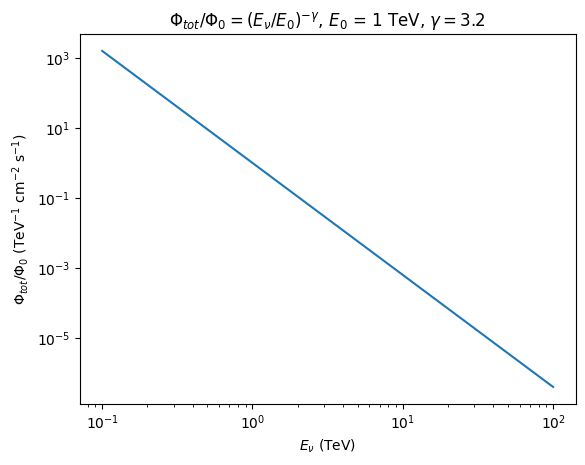

In [3]:
# Plotting the flux (power law) (I think this is total flux?)

import matplotlib.pyplot as plt

# Parameters:
phi0 = 1 # TeV^-1 cm^-2 s^-1
e0 = 1 # TeV
index = 3.2
width = 0.3 # Taken from the 30% energy resolution of track-like events

e_true = np.logspace(-1, 2, num=100)

flux = phi0*(e_true/e0)**(-index)

fig, ax = plt.subplots()
flx = ax.plot(e_true, flux)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$E_{\nu}$ (TeV)")
ax.set_ylabel(r"$\Phi_{tot} / \Phi_0$ (TeV$^{-1}$ cm$^{-2}$ s$^{-1}$)")
ax.set_title(r"$\Phi_{tot} / \Phi_0 = (E_{\nu} / E_0)^{-\gamma}$, $E_0$ = 1 TeV, $\gamma = 3.2$")
ax.set_xticks([10**-1, 10**0, 10**1, 10**2])
plt.show()

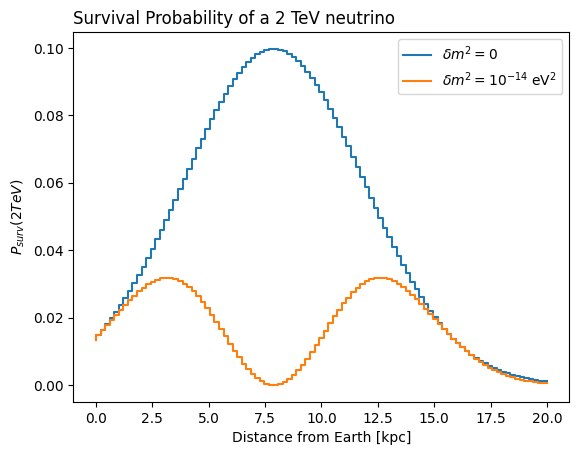

In [30]:
# Plotting the Gaussian used in the NGC paper

from scipy.stats import norm
from scipy.integrate import quad

a = np.linspace(0, 20, 100)

width = 4
dist_peak = 8
gauss = norm.pdf(a, dist_peak, width)
mult = norm.pdf(a, dist_peak, width) * (np.cos(((np.pi)/16)*a))**2

fig, ax = plt.subplots()
gauss, = ax.step(a, gauss)
mult, = ax.step(a, mult)
ax.set_xlabel(r"Distance from Earth [kpc]")
ax.set_ylabel(r"$P_{surv}(2 TeV)$")
ax.set_title("Survival Probability of a 2 TeV neutrino", loc="left")
# ax.set_title("$\delta m^2 = 10^{-14}$ eV$^2$", loc='right')
ax.legend([gauss, mult], [r"$\delta m^2 = 0$", r"$\delta m^2 = 10^{-14}$ eV$^2$"])

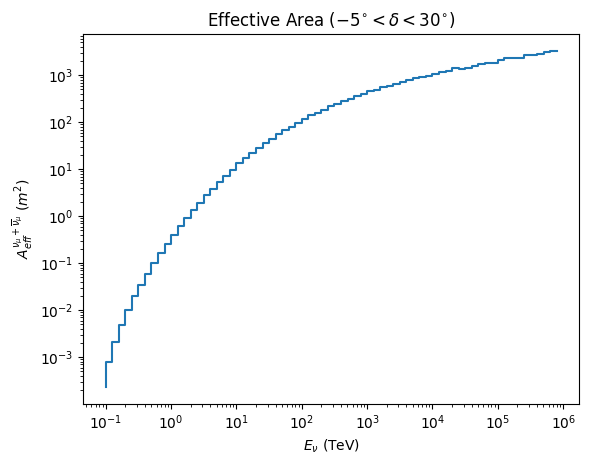

In [44]:
# Plotting Effective Area

fig, ax = plt.subplots()
plot1 = ax.step(eff_a[:,0], eff_a[:,4])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$E_{\nu}$ (TeV)")
ax.set_ylabel(r"$A_{eff}^{\nu_{\mu} + \overline{\nu}_{\mu}}$ ($m^2$)")
ax.set_title(r"Effective Area ($-5^{\circ} < \delta < 30^{\circ}$)")
plt.show()

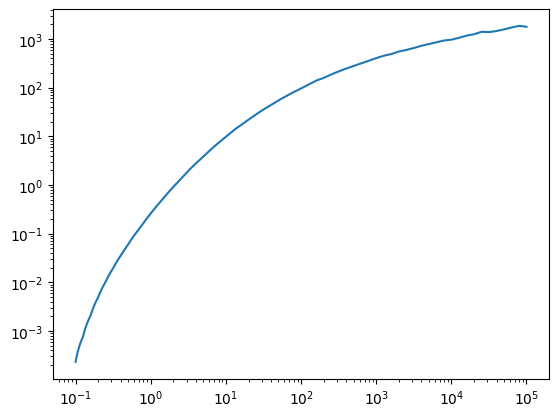

In [31]:
from scipy.interpolate import interp1d

x = eff_a[:,0]
y = eff_a[:,4]
f = interp1d(x, y)

a = np.logspace(-1, 5, 1000)
ynew = f(a)
fig, ax = plt.subplots()
plot = ax.plot(a, ynew)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [ ]:
def TrueIntApproxLog(log_e_reco, del_m2):
    lower_bound = max(np.log10(e_min), log_e_reco-1.5)
    upper_bound = min(np.log10(e_max), log_e_reco+1.5)
    bins = np.linspace(lower_bound, upper_bound, 10)
    evals = []
    for i in range(len(bins)-1):
        evals.append(TrueIntegrandLog(bins[i], bins[i+1], del_m2)(bins[i+1] - bins[i]))




In [3]:
import numpy as np
from scipy import signal, interpolate

a = -1
b = 2
m = -10
n = 15

samples_num = 100
x_eval_index = 200
t_eval_index = 300

x_samples = np.linspace(a, b, samples_num)
t_samples = np.linspace(m, n, samples_num)
dx = x_samples[1]-x_samples[0]
dt = t_samples[1]-t_samples[0]

g = lambda x,t: np.exp(-np.abs(x))+t
h = lambda x,t: np.exp(-np.abs(x))-t

discretG = g(x_samples[None, :], t_samples[:, None])
discretH = h(x_samples[None, :], t_samples[:, None])

discretF = signal.fftconvolve(discretG, discretH, mode='full')

In [9]:
print(discretF)

[[  -99.86466472  -199.72100176  -299.56862679 ...  -299.94161998
   -199.96224169   -99.98168436]
 [ -194.67882438  -389.34099341  -583.98573843 ...  -584.73172482
   -389.82347329  -194.91286367]
 [ -284.506248    -568.98751297  -853.44264193 ...  -854.56162151
   -569.71123278  -284.85730693]
 ...
 [ -651.93049043 -1303.83599782 -1955.7153692  ... -1956.83434878
  -1304.55971763  -652.28154936]
 [ -442.15357186  -884.29048836 -1326.40998086 ... -1327.15596724
   -884.77296824  -442.38761115]
 [ -224.86466472  -449.72100176  -674.56862679 ...  -674.94161998
   -449.96224169  -224.98168436]]


In [19]:
a = [1, 2, 3]
b = [4, 5]
d = [0, 0, 0]
print(d)
c = a+b+d
print(c)
d = np.zeros((4))
print(d)

[0, 0, 0]
[1, 2, 3, 4, 5, 0, 0, 0]
[0. 0. 0. 0.]


AttributeError: 'list' object has no attribute 'pdf'